# Mobile insights

## CSV

### 0. Import libraries

In [1]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options


### 1. Settings

In [2]:
# Time period 1st Jan - 30th April (arbitrary )

# API credentials
# Email address 705762800217-compute@developer.gserviceaccount.com
# Key IDs 948ee8e2a420ef14a5d5a29bd35104fe2f1e6ed4
 

In [3]:
# open file. It is requested via API explorer using request parameters:

#Account: Skein.co
#Property: Skein.co
#View: Skein.co - Report
#ids: ga:93735856
#start-date: 2017-02-01
#end-date: 2017-04-30

#metrics
#ga:sessions
#ga:sessionsWithEvent
#ga:bounceRate

#dimensions
#ga:deviceCategory

### 2. Data import & transformation

In [4]:
# Open file
input_mob= pd.read_csv('skein_data/Skein_mob.csv')

# rename columns
input_mob.columns=['Device','Sessions','Bounce Rate','Conversions'] 

# group by device
input_mob = input_mob.set_index('Device')

input_mob

,Sessions,Bounce Rate,Conversions
Device,,,
desktop,1855,69.487871,68
mobile,520,36.346154,9
tablet,20,75.000000,0


### 3. Calculate

In [5]:
input_mob['CR'] = input_mob.Conversions / input_mob.Sessions * 100
input_mob

,Sessions,Bounce Rate,Conversions,CR
Device,,,,
desktop,1855,69.487871,68,3.665768
mobile,520,36.346154,9,1.730769
tablet,20,75.000000,0,0.000000


In [6]:
mobile_Sessions = input_mob.loc['mobile','Sessions']
desktop_CR = input_mob.loc['desktop','CR']
mobile_Conversions = input_mob.loc['mobile','Conversions']
mobile_CR = input_mob.loc['mobile','CR']

conv_increase =  "%.0f" % (mobile_Sessions * desktop_CR - mobile_Conversions)
conv_increase = int(conv_increase)

#mobileSessions
#desktopCR
#mobileConversions
mobile_CR

1.7307692307692308

### 4. Validate

In [7]:
#if mobile CR is greater, equel or less by more than 20% result is failed

dif = mobile_CR / desktop_CR

if dif > 0.8:
    result = False
    
else:
    result = True
    
result

True

### 5. Visualise

Have 1897 more conversions per month by optmising mobile UX


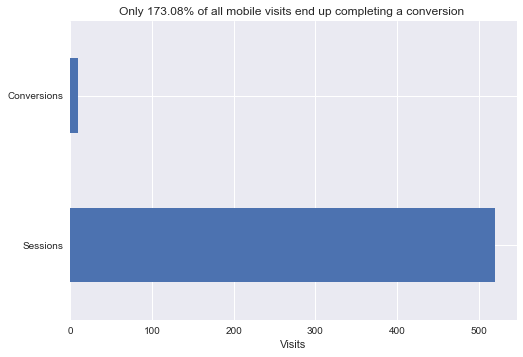

In [8]:
output_chart_mob = input_mob.loc['mobile',['Sessions','Conversions']]
output_chart_mob.plot.barh(stacked=True)

labels = output_chart_mob.index
sizes = output_chart_mob

# colours are taken from http://tools.medialab.sciences-po.fr/iwanthue/
colors = ['#b94663','#6fac5d', '#677ad1']
explode = (0, 0, 0)
plt.xlabel('Visits')
plt.title('Only %s ' % ("%.2f" % (mobile_CR*100) +'% of all mobile visits end up completing a conversion' ))

#need to specify analytics time perdiod
print ("Have %s more conversions per month by optmising mobile UX" % conv_increase)

plt.show()


## JSON

### 0. Import libraries

In [6]:
import json

%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

In [10]:
with open('files/TMRW_mob.json') as file: #открываем файл на чтение
    input_mob = json.load(file) #загружаем из файла данные в словарь data
input_mob

{'columnHeaders': [{'columnType': 'DIMENSION',
   'dataType': 'STRING',
   'name': 'ga:deviceCategory'},
  {'columnType': 'METRIC', 'dataType': 'INTEGER', 'name': 'ga:sessions'},
  {'columnType': 'METRIC', 'dataType': 'INTEGER', 'name': 'ga:bounces'},
  {'columnType': 'METRIC',
   'dataType': 'INTEGER',
   'name': 'ga:sessionsWithEvent'}],
 'containsSampledData': False,
 'id': 'https://www.googleapis.com/analytics/v3/data/ga?ids=ga:123303369&dimensions=ga:deviceCategory&metrics=ga:sessions,ga:bounces,ga:sessionsWithEvent&start-date=2017-01-01&end-date=2017-04-30',
 'itemsPerPage': 1000,
 'kind': 'analytics#gaData',
 'profileInfo': {'accountId': '78795478',
  'internalWebPropertyId': '117885953',
  'profileId': '123303369',
  'profileName': 'All Web Site Data',
  'tableId': 'ga:123303369',
  'webPropertyId': 'UA-78795478-1'},
 'query': {'dimensions': 'ga:deviceCategory',
  'end-date': '2017-04-30',
  'ids': 'ga:123303369',
  'max-results': 1000,
  'metrics': ['ga:sessions', 'ga:bounces'

In [18]:
columns = input_mob['columnHeaders']
columns

[{'columnType': 'DIMENSION',
  'dataType': 'STRING',
  'name': 'ga:deviceCategory'},
 {'columnType': 'METRIC', 'dataType': 'INTEGER', 'name': 'ga:sessions'},
 {'columnType': 'METRIC', 'dataType': 'INTEGER', 'name': 'ga:bounces'},
 {'columnType': 'METRIC',
  'dataType': 'INTEGER',
  'name': 'ga:sessionsWithEvent'}]

In [21]:
rows = input_mob['rows']
rows

[['desktop', '4263', '2251', '124'],
 ['mobile', '2352', '1468', '32'],
 ['tablet', '278', '155', '3']]